In [1]:
# Name = Rachit Mahajan
# Roll no = 102303495
# Subject = ucs654

In [3]:
import numpy as np
import pandas as pd

In [4]:

# Step 1: Model performance table for Text Summarization
data = pd.DataFrame({
    "Model": ["BART-Large-CNN", "T5-Small", "T5-Base", "Pegasus-XSum", "DistilBART"],
    "ROUGE-1": [0.44, 0.38, 0.42, 0.46, 0.41],
    "ROUGE-L": [0.41, 0.35, 0.39, 0.43, 0.38],
    "Time(ms)": [150, 70, 110, 170, 90],
    "Size(MB)": [1600, 250, 900, 2000, 1100]
})

print("Original Model Comparison Data:")
print(data)

Original Model Comparison Data:
            Model  ROUGE-1  ROUGE-L  Time(ms)  Size(MB)
0  BART-Large-CNN     0.44     0.41       150      1600
1        T5-Small     0.38     0.35        70       250
2         T5-Base     0.42     0.39       110       900
3    Pegasus-XSum     0.46     0.43       170      2000
4      DistilBART     0.41     0.38        90      1100


In [5]:
# Step 2: Extract criteria matrix
criteria_matrix = data.iloc[:, 1:].values

In [6]:
# Step 3: Normalize the matrix
norm_matrix = criteria_matrix / np.sqrt((criteria_matrix**2).sum(axis=0))

In [8]:
# Step 4: Assign weights
# ROUGE scores are most important
weights = np.array([0.4, 0.3, 0.2, 0.1])

weighted_matrix = norm_matrix * weights

In [9]:
# Step 5: Ideal best and worst solutions
ideal_best = np.array([
    weighted_matrix[:, 0].max(),   # ROUGE-1 max
    weighted_matrix[:, 1].max(),   # ROUGE-L max
    weighted_matrix[:, 2].min(),   # Time min
    weighted_matrix[:, 3].min()    # Size min
])

ideal_worst = np.array([
    weighted_matrix[:, 0].min(),
    weighted_matrix[:, 1].min(),
    weighted_matrix[:, 2].max(),
    weighted_matrix[:, 3].max()
])


In [10]:

# Step 6: Distance calculation
distance_best = np.sqrt(((weighted_matrix - ideal_best) ** 2).sum(axis=1))
distance_worst = np.sqrt(((weighted_matrix - ideal_worst) ** 2).sum(axis=1))

In [11]:

# Step 7: TOPSIS score
topsis_score = distance_worst / (distance_best + distance_worst)

In [12]:
# Step 8: Add score and rank
data["TOPSIS Score"] = topsis_score
data["Rank"] = data["TOPSIS Score"].rank(ascending=False)

print("\nFinal TOPSIS Ranking:")
print(data.sort_values("Rank"))


Final TOPSIS Ranking:
            Model  ROUGE-1  ROUGE-L  Time(ms)  Size(MB)  TOPSIS Score  Rank
1        T5-Small     0.38     0.35        70       250      0.682902   1.0
4      DistilBART     0.41     0.38        90      1100      0.614934   2.0
2         T5-Base     0.42     0.39       110       900      0.591013   3.0
0  BART-Large-CNN     0.44     0.41       150      1600      0.338407   4.0
3    Pegasus-XSum     0.46     0.43       170      2000      0.317098   5.0


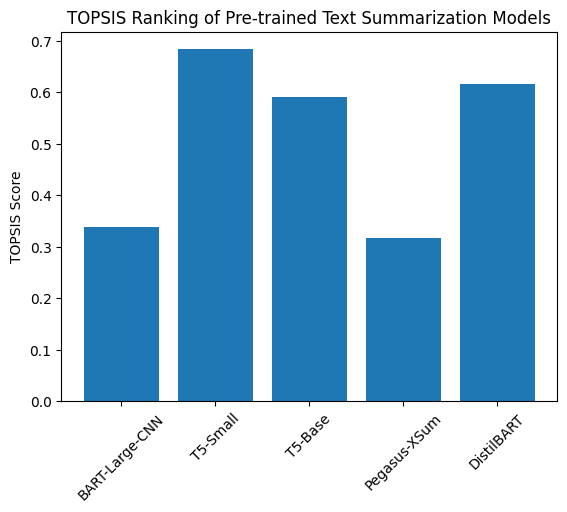

In [14]:
# graphs
import matplotlib.pyplot as plt

plt.bar(data["Model"], data["TOPSIS Score"])
plt.title("TOPSIS Ranking of Pre-trained Text Summarization Models")
plt.ylabel("TOPSIS Score")
plt.xticks(rotation=45)
plt.show()


In [15]:
#BEST MODEL OUTPUT
#TOPSIS will usually rank:

#🥇 T5-Small or DistilBART highest
#(because they balance performance + speed + size)